# 4.10 Coding Etiquette & Excel Reporting

## This script contains the following points:
** **

5. Customer profiling

  * 5.1 Market segmentation by demographics
         
     * 5.1.1 Age segmentation of Instacart customers
     * 5.1.2 Income-based segmentation of IC customers
     * 5.1.3 Segmentation based on the number of dependents and relationship of IC customers
     * 5.1.4 Segmentation by department 
        
        
  * 5.2 Market segmentation based on behavior
    
      * 5.2.1 Snacks eater
      * 5.2.2 Customers that do not use alcohol
      * 5.2.3 Customers who own pets
      * 5.2.4 Vegetarian customers
      * 5.2.5 Parents with babies
      * 5.2.6 Early birds and night owls 
6. Customer profile visualization

7. Customer profile aggregation for usage frequency and expenditure

8. Customer profile comparison in regions and departments


9. Exporting updated dataframes and charts
    * 9.1 Exporting dataframes
    * 9.2 Exporting charts
    
** **    

In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [2]:
# Set a path

path = r'/Users/berk/Instacart_Grocery_Basket_Analysis'

In [3]:
# Import df_igh dataframe

df_high = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'high_activity_customers.pkl'))

# 5. Customer profiling

## 5.1 Market segmentation by demographics

### 5.1.1 Age segmentation of Instacart customers

Given that the Instacart CFO is not interested in users who don't contribute significantly to the app's income, we will use the 'high activity customers' information to profile users.

In [4]:
# Start profiling high activity customers

custs = df_high

In [5]:
custs.shape

(30964564, 34)

In [6]:
# Check the descriptive statistics in the 'age' column

custs['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

The describe() function's output shows that the youngest age in the data is 18 and the oldest is 81.

* Age categories will be classified as follows:
     * Youth         18 - 39
     * Middle Age    40 - 64
     * Seniors   65+

In [7]:
#Catching warning messages

pd.options.mode.chained_assignment = None

In [8]:
# Create an age_category column

custs.loc[(custs['age'] >= 18) & (custs['age'] < 40), 'age_category'] = 'Youth'
custs.loc[(custs['age'] >= 40) & (custs['age'] < 65), 'age_category'] = 'Middle age'
custs.loc[custs['age'] >= 65, 'age_category'] = 'Senior'
custs['age_category'].value_counts()

Middle age    12103910
Youth         10665110
Senior         8195544
Name: age_category, dtype: int64

In [9]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 35)

### 5.1.2 Income-based segmentation of IC customers

In [10]:
# Check the descriptive statistics in the 'income' column

custs['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

The 'income' variable was analyzed using describe(), revealing a range of 25.9k USD to 593.9k USD reported by IC families. Income categories will be:

* Low: < 70K USD
* Middle: 70K - 100K USD
* Upper Middle: 100K - 130K USD
* High: > 130K USD.


In [11]:
# Create an income_category column

custs.loc[custs['income']< 70000, 'income_category'] = 'Low'
custs.loc[(custs['income']>= 70000) & (custs['income']< 100000), 'income_category'] = 'Middle'
custs.loc[(custs['income']>= 100000) & (custs['income']< 130000), 'income_category'] = 'Upper Middle'
custs.loc[custs['income']>= 130000, 'income_category'] = 'High'

In [12]:
# Check income_category values

custs['income_category'].value_counts(dropna = False)

Low             8520533
Middle          8236629
High            7401414
Upper Middle    6805988
Name: income_category, dtype: int64

In [13]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 36)

### 5.1.3 Segmentation based on the number of dependents and relationship of IC customers

In [14]:
# Check the descriptive statistics in the 'number_dependents' column

custs['number_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependents, dtype: float64

The describe() function shows that the range of 'number_dependents' is from 0 to 3. Family size will be:

   * Small: 0
   * Mid size: 1-2
   * Large: 3

In [15]:
# Create a family_size column 

custs.loc[custs['number_dependents'] == 0, 'family_size'] = 'Small'
custs.loc[(custs['number_dependents'] == 1) | (custs['number_dependents'] == 2), 'family_size'] = 'Mid size'
custs.loc[custs['number_dependents'] > 2, 'family_size'] = 'Large'

In [16]:
custs['family_size'].value_counts(dropna = False)

Mid size    15452367
Large        7772516
Small        7739681
Name: family_size, dtype: int64

In [17]:
# Comparing family status with whether they have dependents

family_crosstab = pd.crosstab(custs['fam_status'],custs['number_dependents'],dropna = False)

In [18]:
family_crosstab

number_dependents,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [19]:
custs.loc[(custs['fam_status'] == 'married') & (custs['number_dependents'] == 1), 'household'] = 'Couple without Children'
custs.loc[(custs['fam_status'] == 'married') & (custs['number_dependents'] >= 2), 'household'] = 'Couple with Children'
custs.loc[(custs['fam_status'] == 'divorced/widowed') | (custs['fam_status'] == 'single'), 'household'] = 'Single Adult'
custs.loc[custs['fam_status'] == 'living with parents and siblings', 'household'] = 'Large Family'

In [20]:
custs['household'].value_counts(dropna = False)

Couple with Children       14532650
Single Adult                7739681
Couple without Children     7211061
Large Family                1481172
Name: household, dtype: int64

In [21]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 38)

### 5.1.4 Segmentation by department

We can use the 'department' dataframe to match department names with their corresponding IDs in the 'custs' dataset.

In [22]:
# Import departments dataframe

df_depts = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'departments_wrangled.csv'), index_col = False)

In [23]:
# Calling 'department' dataframe

df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [24]:
# Renaming index column

df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [25]:
# Checking output

df_depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [26]:
# Create a dictionary 

depts_map = dict(zip(df_depts["department_id"], df_depts["department"]))

In [27]:
# Customers are linked to departments using the map() and (dept_map) functions

custs['department'] = custs['department_id'].map(depts_map)

In [28]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 39)

In [29]:
# Distribution of 'department' values in 'custs' dataframe

custs['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

## 5.2 Market segmentation based on behavior

### 5.2.1 Snacks eater

In [30]:
# Create a snacks_eater column

custs.loc[custs['department'] == 'snacks', 'snacks_eater'] = 'Yes'
custs.loc[custs['department'] != 'snacks', 'snacks_eater'] = 'No'

In [31]:
custs['snacks_eater'].value_counts(dropna = False)

No     28198158
Yes     2766406
Name: snacks_eater, dtype: int64

In [32]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 40)

### 5.2.2 Customers that do not use alcohol

In [33]:
# Create an alcohol_drinker column

custs.loc[custs['department'] !='alcohol', 'alcohol_drinker'] = 'No'
custs.loc[custs['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [34]:
custs['alcohol_drinker'].value_counts(dropna = False)

No     30819937
Yes      144627
Name: alcohol_drinker, dtype: int64

In [35]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 41)

### 5.2.3 Customers who own pets

In [36]:
# Creata an pet_owner column

custs.loc[custs['department'] == 'pets', 'pet_owner'] = 'Yes'
custs.loc[custs['department'] != 'pets', 'pet_owner'] = 'No'

In [37]:
custs['pet_owner'].value_counts(dropna= False)

No     30871504
Yes       93060
Name: pet_owner, dtype: int64

In [38]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 42)

### 5.2.4 Vegetarian customers

In [39]:
# Create list to assign 'vegetarian' column's values. If a customer never purchased 'meat seafood' or deli, 
# then we assume them a vegetarian.

result = []
for value in custs['department_id']:
    
    # 12 'meat seafood' and 20 is the department_id of 'deli'
    
    if value not in (12,20):
        result.append('Yes')
    else:
        result.append('No')

In [40]:
# Assign 'result' list values to 'vegetarian' column

custs['vegetarian'] = result

In [41]:
# Check 'vegetarian' values in customers

custs['vegetarian'].value_counts(dropna = False)

Yes    29285949
No      1678615
Name: vegetarian, dtype: int64

In [42]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 43)

### 5.2.5 Parents with babies

In [43]:
# Creating 'parents_with_baby' column based on department

custs.loc[custs['department'] !='babies', 'parents_with_baby'] = 'No'
custs.loc[custs['department'] =='babies', 'parents_with_baby'] = 'Yes'

In [44]:
custs['parents_with_baby'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: parents_with_baby, dtype: int64

In [45]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 44)

### 5.2.6 Early birds and night owls

In [46]:
# Check the distribution of orders in 24 hours a day

custs['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

In [47]:
# Create a 'order_time_habit' column based on order time

custs.loc[custs['order_hour_of_day'] <5 , 'order_time_habit'] = 'Night owl'
custs.loc[(custs['order_hour_of_day']>= 9) & (custs['order_hour_of_day']<= 23), 'order_time_habit'] = 'Regular'
custs.loc[(custs['order_hour_of_day']>= 5) & (custs['order_hour_of_day']< 9), 'order_time_habit'] = 'Early bird'

In [48]:
custs['order_time_habit'].value_counts(dropna = False)

Regular       27593897
Early bird     2887754
Night owl       482913
Name: order_time_habit, dtype: int64

In [49]:
# Check for the new column in the 'custs' dataset.

custs.shape

(30964564, 45)

# 6. Customer profile visualization

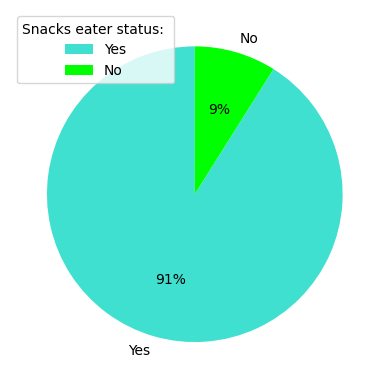

In [50]:
# Create a pie chart of the 'snacks_eater' column

pie_snacks = custs['snacks_eater'].value_counts().plot.pie(labels = ['Yes','No'], autopct=('%1.f%%'), colors = ['turquoise','lime'], label = '', startangle=90)
pie_snacks.legend(title = 'Snacks eater status: ', loc = 'best')

Text(0.5, 0, 'Status')

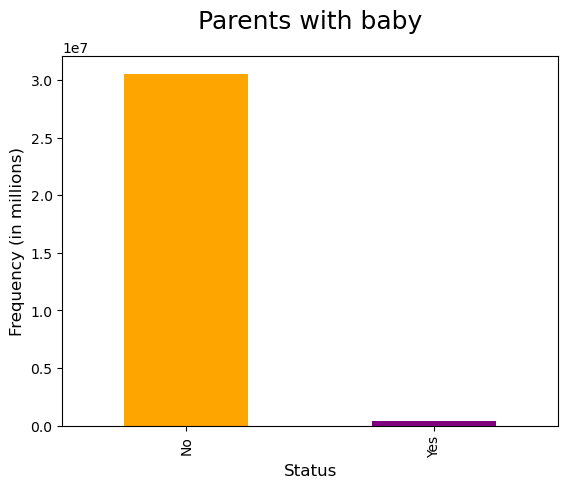

In [51]:
# Create a bar chart of the 'parents_with_baby' column

bar_babies = custs['parents_with_baby'].value_counts().plot.bar( color = ['orange', 'purple'])
plt.title('Parents with baby', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Status',  fontsize = 12)


Text(0.5, 0, 'Status')

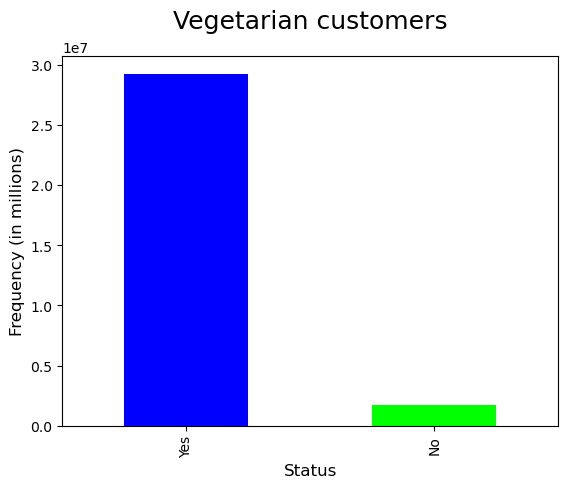

In [52]:
# Create a bar chart of the 'vegetarian' column

bar_vegetarian = custs['vegetarian'].value_counts().plot.bar( color = ['blue', 'lime'])
plt.title('Vegetarian customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Status',  fontsize = 12)

Text(0.5, 0, 'Order Habits')

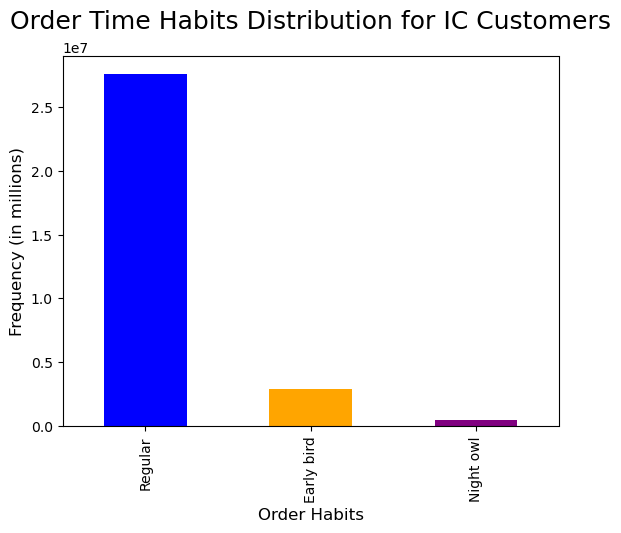

In [53]:
# Create a bar chart of the 'order_time_habit' column

bar_time = custs['order_time_habit'].value_counts().plot.bar( color = ['blue', 'orange', 'purple'])
plt.title('Order Time Habits Distribution for IC Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Habits',  fontsize = 12)


In [54]:
# Create a stacked-bar chart of 'income_category' column in different regions

crosstab_income_region = pd.crosstab (custs['region'], custs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle,Upper Middle
region,,,,
Midwest,1763002,1974266,1887154,1637091
Northeast,1308807,1486808,1461393,1207677
South,2442801,2849538,2797656,2221144
West,1886804,2209921,2090426,1740076


Text(0.5, 0, '')

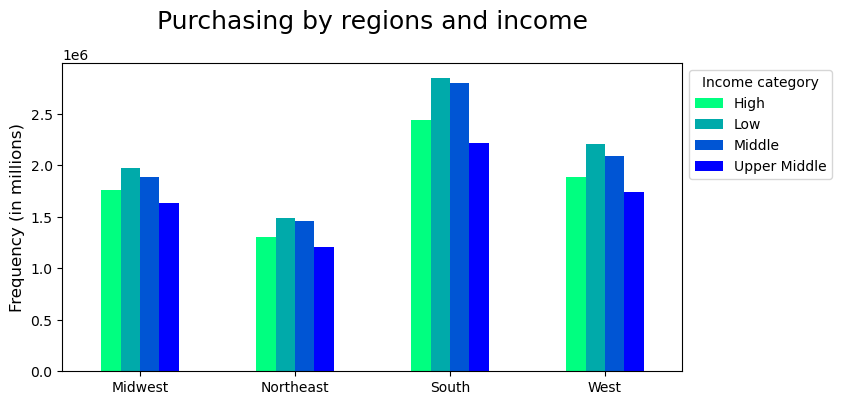

In [55]:
# Create a bar chart of income categorie in the US regions

bar_income = crosstab_income_region.plot(kind = 'bar', figsize =(8,4), rot = 0, colormap ='winter_r').legend(title ="Income category", bbox_to_anchor = (1.0,1.0))
plt.title('Purchasing by regions and income', fontsize = 18, pad =25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('')

#### **Chart Observation:**

Discounts and promotions can be offered on popular items to support low-income customers who make up the largest portion of IC customers.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple with Children'),
  Text(1, 0, 'Single Adult'),
  Text(2, 0, 'Couple without Children'),
  Text(3, 0, 'Large Family')])

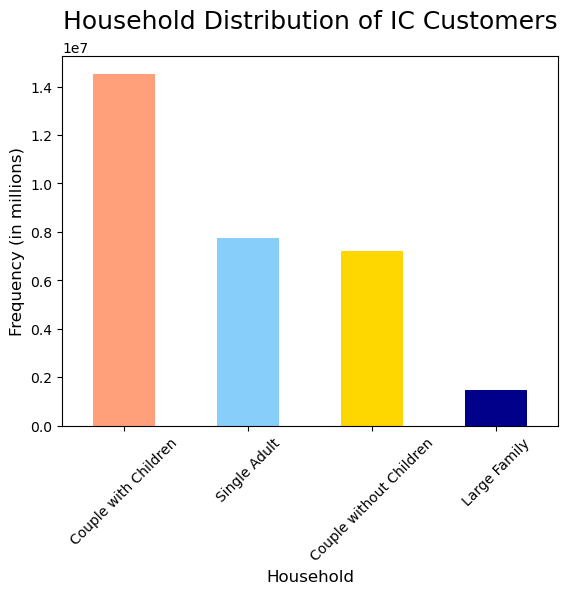

In [56]:
# Create a bar chart of 'household' column

bar_household = custs['household'].value_counts().plot.bar(color = ['lightsalmon', 'lightskyblue', 'gold', 'darkblue'])
plt.title('Household Distribution of IC Customers', fontsize = 18, pad = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation = 45)

#### **Chart Observation:**

Marketing campaigns and promotions should take into account that couples with children constitute the majority of IC households.

In [57]:
# Comparison in 'order_time_habit' and 'loyalty'

ct_loy_hbt = pd.crosstab(custs['loyalty_flag'], custs['order_time_habit'], dropna = False)
ct_loy_hbt

order_time_habit,Early bird,Night owl,Regular
loyalty_flag,,,
Loyal customer,1132804,139971,9011318
New customer,356670,86178,4360847
Regular customer,1398280,256764,14221732


Text(0.5, 0, 'Loyalty Status')

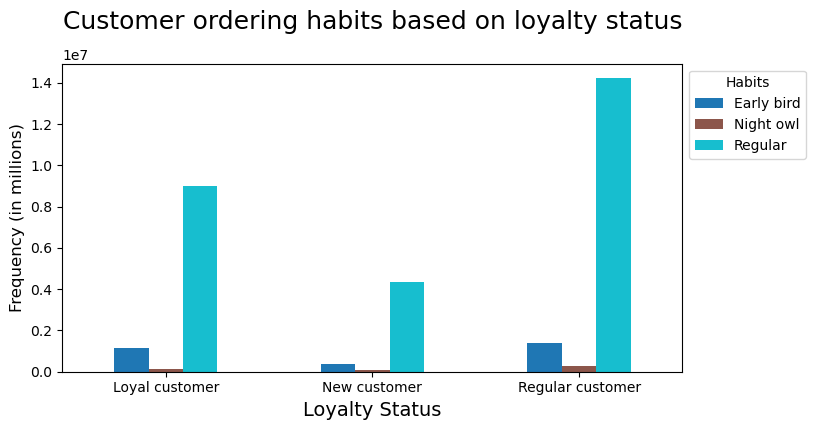

In [58]:
# Create a bar chart

bar_loy_hbt = ct_loy_hbt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap = 'tab10').legend(title = "Habits", bbox_to_anchor = (1.0,1.0))
plt.title('Customer ordering habits based on loyalty status', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Loyalty Status',  fontsize = 14)

In [59]:
# Comparison in 'order_time_habit' and 'age'

ct_age_hbt = pd.crosstab(custs['age_category'], custs['order_time_habit'], dropna = False)
ct_age_hbt

order_time_habit,Early bird,Night owl,Regular
age_category,,,
Middle age,1124900,185932,10793078
Senior,773040,126616,7295888
Youth,989814,170365,9504931


Text(0.5, 0, 'Age Category')

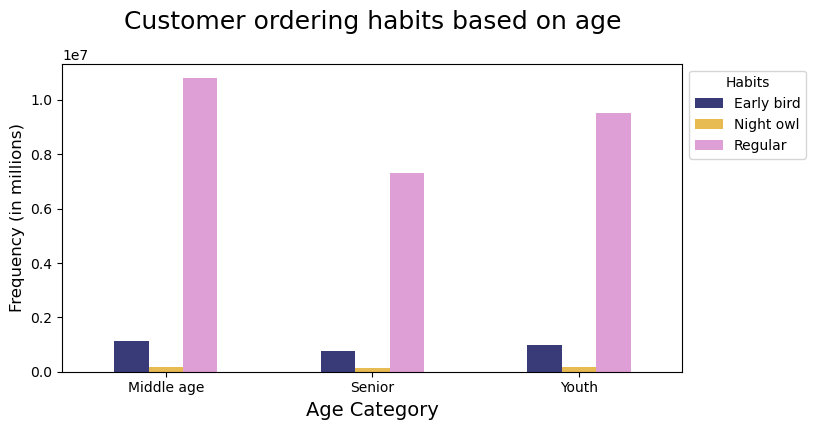

In [60]:
# Create a bar chart

bar_age_hbt = ct_age_hbt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap = 'tab20b').legend(title = "Habits", bbox_to_anchor = (1.0,1.0))
plt.title('Customer ordering habits based on age', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 14)

In [61]:
# Comparison in 'order_time_habit' and 'fam_status'

ct_fam_hbt = pd.crosstab(custs['fam_status'], custs['order_time_habit'], dropna = False)
ct_fam_hbt

order_time_habit,Early bird,Night owl,Regular
fam_status,,,
divorced/widowed,251188,39346,2354737
living with parents and siblings,137259,25032,1318881
married,2022323,338404,19382984
single,476984,80131,4537295


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

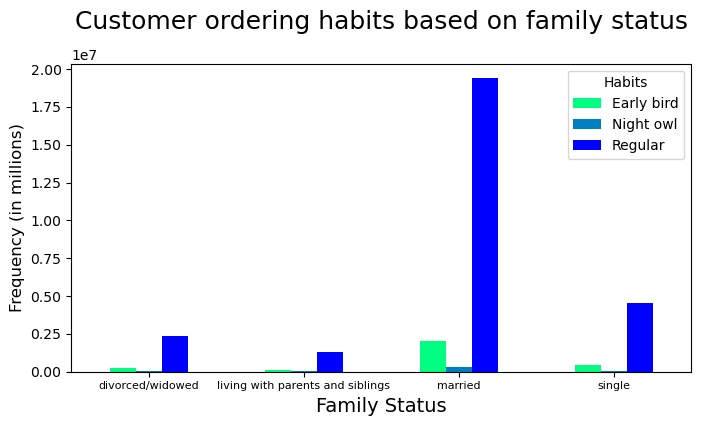

In [62]:
# Create a bar chart

bar_fam_hbt = ct_fam_hbt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap = 'winter_r').legend(title = "Habits", bbox_to_anchor = (1.0,1.0))
plt.title('Customer ordering habits based on family status', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Family Status',  fontsize = 14)
plt.xticks(rotation=0, fontsize = 8)

# 7. Customer profile aggregation for usage frequency and expenditure

In [63]:
# Department category expenditure aggregation

custs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.150699  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.857482  1.0     15.0
beverages         7.682556  1.0     15.0
breakfast         8.031647  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.114599  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.733725  1.0     15.0
household         7.379951  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300034  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014482  1.0     20.0
personal care     7.998744  1.0     15.0
pets              7.887489  1.0     15.0
produce           7.980348  1.0     15.0
snacks            4.275555  1.6      7.0

In [64]:
# Age category usage frequency aggregation

custs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
age_category                           
Middle age            8.354216   1  145
Senior                8.307779   1   99
Youth                 8.415515   1  109

In [65]:
# Region expenditure aggregation

custs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.681835  1.0  99999.0
Northeast  11.542582  1.0  99999.0
South      12.118845  1.0  99999.0
West       11.276491  1.0  99999.0

In [66]:
# Region usage frequency aggregation

custs.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
region                              
Midwest            8.353883   1  109
Northeast          8.376380   1  145
South              8.365296   1  137
West               8.359292   1  114

In [67]:
# Household usage frequency aggregation

custs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                     mean min  max
household                                         
Couple with Children             8.370658   1  145
Couple without Children          8.373970   1  114
Large Family                     8.373383   1  102
Single Adult                     8.336567   1  137

In [68]:
# Income category expenditure aggregation

custs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
High             22.388092  1.0  99999.0
Low               7.366964  1.0  14900.0
Middle            8.847132  1.0  99999.0
Upper Middle     10.016436  1.0  99999.0

In [69]:
# Income category usage frequency aggregation

custs.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
income_category                           
High                     8.480898   1  121
Low                      7.965765   1  137
Middle                   8.528310   1  114
Upper Middle             8.532210   1  145

In [70]:
# Order-time habit with usage frequency aggregation

custs.groupby('order_time_habit').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
order_time_habit                           
Early bird                8.541485   1   93
Night owl                 8.614131   1  109
Regular                   8.339969   1  145

In [71]:
# Order-time habit with expenditure aggregation

custs.groupby('order_time_habit').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
order_time_habit                         
Early bird        12.295262  1.0  99999.0
Night owl         11.453581  1.0  99999.0
Regular           11.904064  1.0  99999.0

In [72]:
# Snacks eater in usage frequency aggregation

custs.groupby('snacks_eater').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
snacks_eater                           
No                    8.280980   1  145
Yes                   9.199468   1  144

In [73]:
# Snacks eater with expenditure aggregation

custs.groupby('snacks_eater').agg({'prices' : ['mean', 'min', 'max']})

prices              
                   mean  min      max
snacks_eater                         
No            12.684813  1.0  99999.0
Yes            4.275555  1.6      7.0

In [74]:
# Loyalty status in usage frequency aggregation

custs.groupby('loyalty_flag').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
loyalty_flag                               
Loyal customer            8.284024   1  137
New customer              8.311567   1  102
Regular customer          8.429793   1  145

# 8. Customer profile comparison in regions and departments

In [75]:
# Comparison in regions and departments

crosstab = pd.crosstab(custs['department'], custs['region'], dropna = False)
crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [76]:
# Comparison in 'order_time_habit' and 'departments'

ct_hbt_dept = pd.crosstab(custs['department'], custs['order_time_habit'], dropna = False)
ct_hbt_dept

order_time_habit,Early bird,Night owl,Regular
department,,,
alcohol,7972,1356,135299
babies,50188,5009,355195
bakery,107807,16374,996647
beverages,231045,41112,2299744
breakfast,68714,9734,592402
bulk,3057,506,29888
canned goods,88259,16065,907750
dairy eggs,515309,75559,4586314
deli,88984,15308,899542


(-1.0, 22.0)

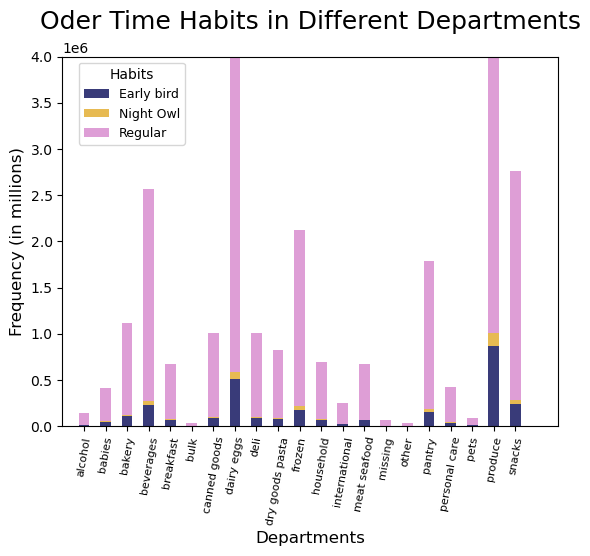

In [77]:
# Create a stacked bar

bar_hbt_dept = ct_hbt_dept.plot(kind = 'bar', stacked = True, colormap = 'tab20b')
bar_hbt_dept.legend(title= 'Habits', bbox_to_anchor = (0.02, 1.0), loc ='upper left', labels = ['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Oder Time Habits in Different Departments', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

# Set the y axis limit to increase the axis length

plt.ylim(0, 4000000)
plt.xlim(-1, 22)

In [78]:
# Creating order_time_habit and region connection

ct_habit = pd.crosstab(custs['region'], custs['order_time_habit'], dropna = False)
ct_habit 

order_time_habit,Early bird,Night owl,Regular
region,,,
Midwest,670594,113520,6477399
Northeast,511923,86857,4865905
South,973296,159939,9177904
West,731941,122597,7072689


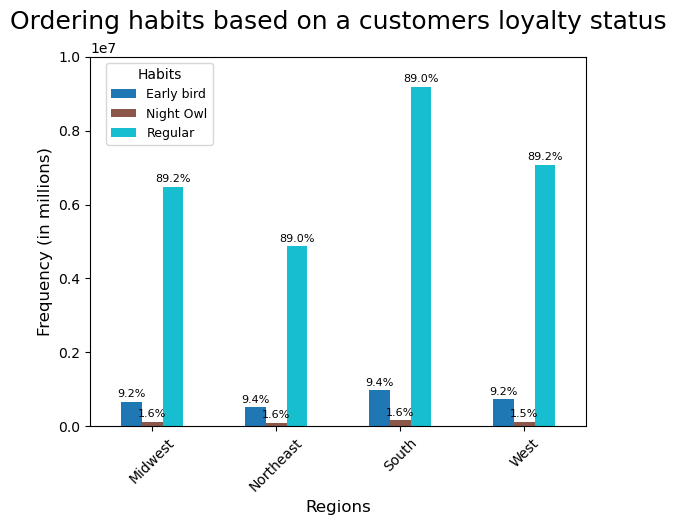

In [79]:
# Plotting the stacked bar

bar_hbt_reg = ct_habit.plot(kind = 'bar', stacked = False, colormap = 'tab10')
bar_hbt_reg.legend(title = 'Habits', bbox_to_anchor = (0.02, 1.0), loc = 'upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Ordering habits based on a customers loyalty status', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Regions',  fontsize = 12)
plt.xticks(rotation=45)

# Annotating the bar chart

# Get the total for each row
total = ct_habit.sum(axis=1)

# Calculate the percent for each row
per = ct_habit.div(total, axis=0).mul(100).round(1)

# Iterate through the containers
for c in bar_hbt_reg.containers:
    
    # Get the current segment label (a string); corresponds to column / legend
    label = c.get_label()
    
    # Create custom labels with the bar height and the percent from the per column
    labels = [f'{row}%'if v.get_height() > 0 else '' for v, row in zip(c,per[(label)])]
    
   # Add the annotation
    bar_hbt_reg.bar_label(c, labels=labels, label_type='edge', fontsize = 8, rotation = 0,  fontweight= 'normal', padding = 2)  
    
    # Set the y axis limit to increase the axis length
    plt.ylim(0, 10000000)
  


In [80]:
# Comparing price ranges and departments

ct_price_dept = pd.crosstab(custs['department'], custs['price_range_loc'], dropna = False)
ct_price_dept

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

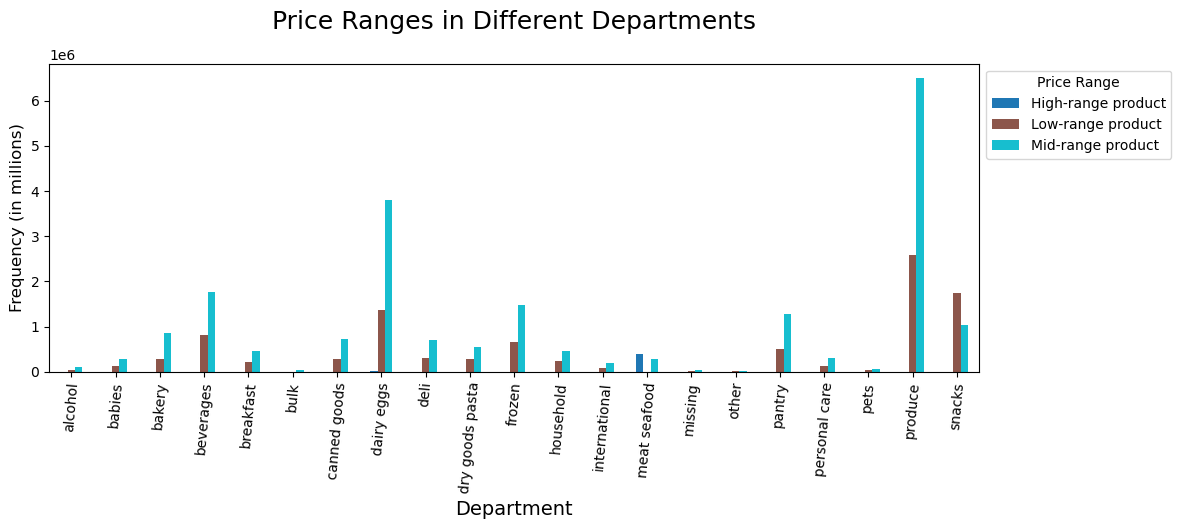

In [81]:
bar_price_dept = ct_price_dept.plot(kind = 'bar', figsize=(12,4), rot = 0, colormap = 'tab10').legend(title = "Price Range", bbox_to_anchor = (1.0,1.0))
plt.title('Price Ranges in Different Departments', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 14)
plt.xticks(rotation = 85)

In [82]:
# Comparing regions and loyalty status

ct_reg_loy = pd.crosstab(custs['region'], custs['loyalty_flag'], dropna = False)
ct_reg_loy

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


Text(0.5, 0, 'Region')

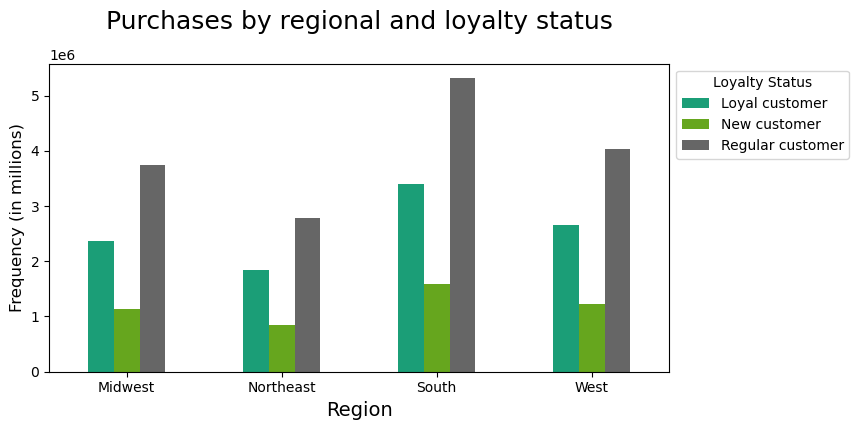

In [83]:
# Create a bar chart

bar_ct_reg_loy = ct_reg_loy.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap = 'Dark2').legend(title = "Loyalty Status", bbox_to_anchor = (1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)

In [84]:
# Comparing loyalty status and departments

ct_loy_dept = pd.crosstab(custs['department'], custs['loyalty_flag'], dropna = False)
ct_loy_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

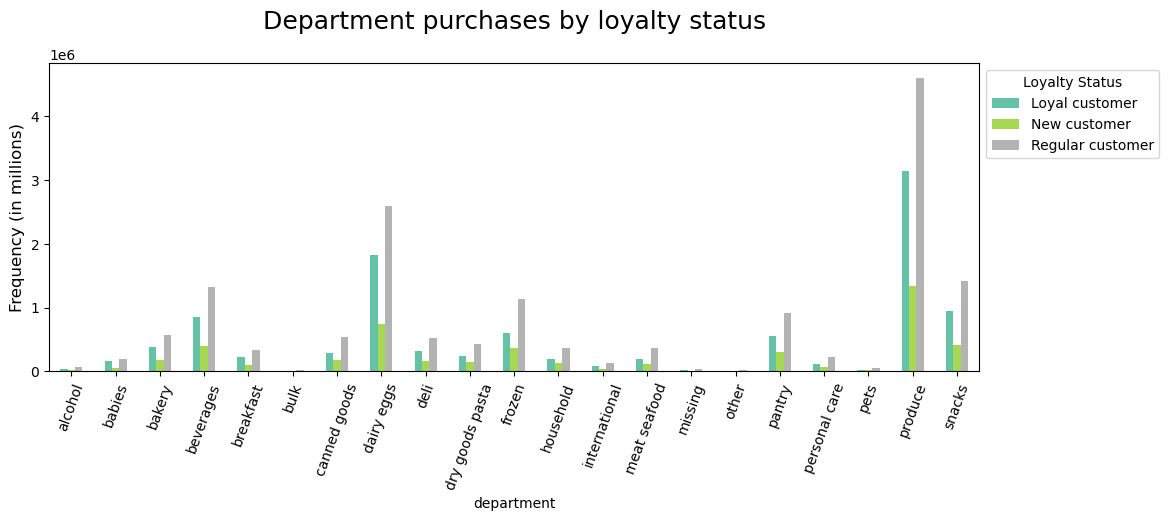

In [85]:
# Create a bar chart 

bar_ct_loy_dept = ct_loy_dept.plot(kind = 'bar', figsize =(12,4), rot = 0, colormap = 'Set2').legend(title = "Loyalty Status", bbox_to_anchor = (1.0,1.0))
plt.title('Department purchases by loyalty status', fontsize = 18, pad = 25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation = 70)

# 9. Exporting updated dataframes and charts

## 9.1 Exporting dataframe

In [86]:
#Export high_activity_custs in .pkl format

custs.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'customer_profiling.pkl'))

## 9.2 Exporting charts

In [87]:
# Exporting snacks eater pie chart in .png format

pie_snacks.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'pie_snacks_eater.png'))

In [88]:
# Exporting order-time-habit bar chart in .png format

bar_time.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_order_time_habit.png'))

In [89]:
# Exporting income category bar chart in .png format

bar_income.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_income_category.png'))

In [90]:
# Exporting income category bar chart in .png format

bar_household.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_household.png'))

In [91]:
# Exporting habit and department bar chart in .png format

bar_hbt_dept.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_habits_depts.png'))

In [92]:
# Exporting habit and regions bar chart in .png format

bar_hbt_reg.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_habits_region.png'))

In [93]:
# Exporting loyalty and regions bar chart in .png format

bar_ct_reg_loy.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty_region.png'))

In [94]:
# Exporting loyalty and departments bar chart in .png format

bar_ct_loy_dept.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loyalty_depts.png'))

In [95]:
# Exporting price_range and departments bar chart in .png format

bar_price_dept.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_price_depts.png'))

In [96]:
# Exporting loyalty and habits bar chart in .png format

bar_loy_hbt.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_loy_hbt.png'))

In [97]:
# Exporting age and habits bar chart in .png format

bar_age_hbt.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_age_hbt.png'))

In [98]:
# Exporting family status and habits bar chart in .png format

bar_fam_hbt.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_fam_hbt.png'))

In [99]:
# Exporting Parents with baby bar chart in .png format

bar_babies.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_babies.png'))